In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Age'].isna()] #returns all age rows where it is nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
df['Age']=df.groupby(['Pclass','Sex'])['Age'].transform(lambda x:x.fillna(x.median())) #this fills missing values with the median of those 2 columns

In [ ]:
df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df.drop(columns=['Cabin'],inplace=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
x=df.loc[df['Pclass']==1,'Embarked']
X=pd.DataFrame(x)
X.value_counts()

Embarked
S           127
C            85
Q             2
Name: count, dtype: int64

In [ ]:
df.loc[df['Embarked'].isna(),'Embarked']='S' #df.loc[row,column]

In [ ]:
print(df['Embarked'].isna().sum())

0


In [ ]:
df[(df['Survived']!=0)&(df['Survived']!=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
df[df['Age']<=0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
df[df['Fare']<=0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.0,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,40.0,0,0,112052,0.0,S


In [ ]:
df['Fare']=df.groupby('Pclass')['Fare'].transform(lambda x : x.replace(0,x.median()))

In [ ]:
df[df['Fare']<=0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.674620
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.608084
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='object')

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.674620
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.608084
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# df['Sex'].unique()
df['Sex'].replace({'male':1,'female':0},inplace=True)
print(df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


C:\Users\swapn\AppData\Local\Temp\ipykernel_17416\1813888396.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'male':1,'female':0},inplace=True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_17416\1813888396.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace({'

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
df['Age_State']=pd.cut(df['Age'],bins=[0,12,18,35,60,100],right=True,labels=['Child','Teen','Adult','Middle-aged','Senior'])
df['Age_State'].head()

0          Adult
1    Middle-aged
2          Adult
3          Adult
4          Adult
Name: Age_State, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Adult' < 'Middle-aged' < 'Senior']

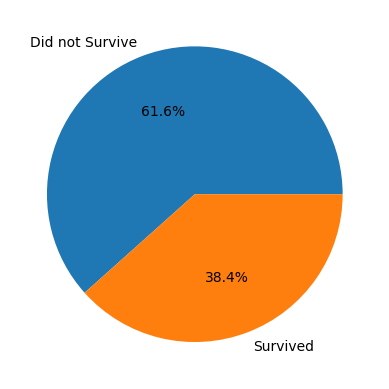

In [ ]:
plt.pie(df['Survived'].value_counts(),labels=['Did not Survive','Survived'],autopct='%1.1f%%')
plt.show()

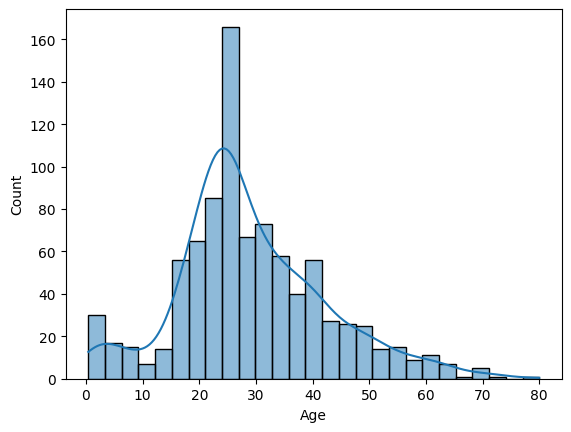

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.show()

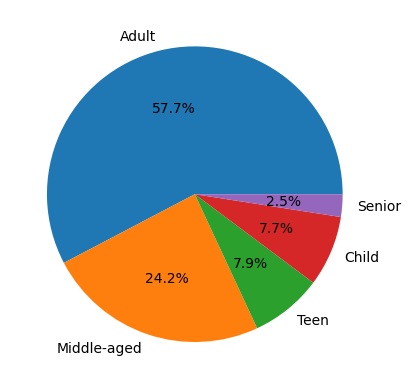

In [ ]:
plt.pie(df['Age_State'].value_counts(),labels=df['Age_State'].value_counts().index,autopct='%1.1f%%')
plt.show()

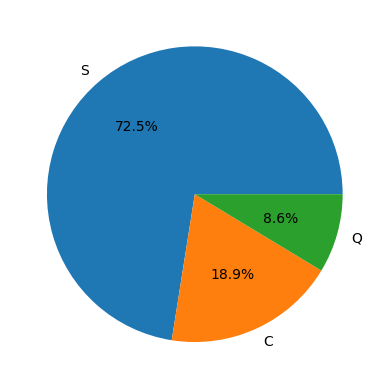

In [ ]:
plt.pie(df['Embarked'].value_counts(),labels=df['Embarked'].value_counts().index,autopct='%1.1f%%')
plt.show()

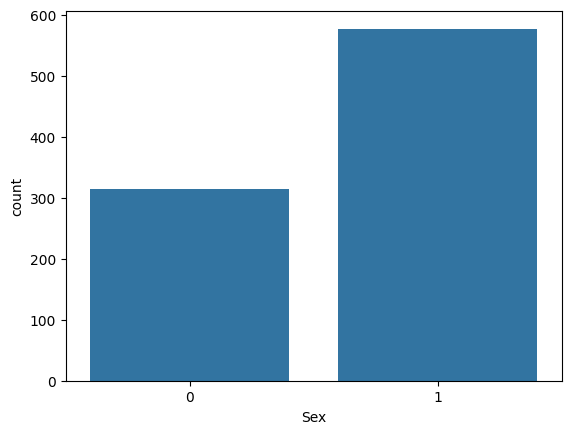

In [ ]:
sns.countplot(data=df,x='Sex')
plt.show()

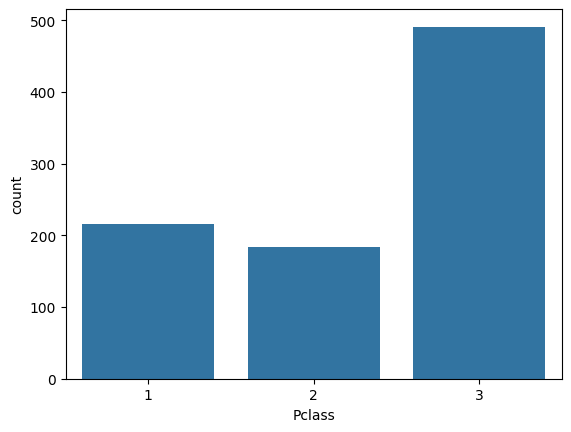

In [ ]:
sns.countplot(data=df,x='Pclass')
plt.show()

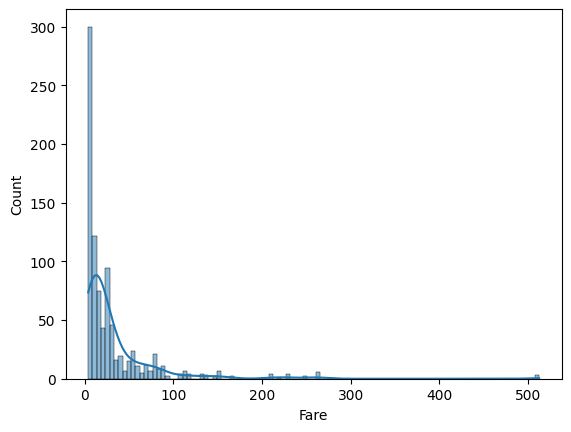

In [ ]:
sns.histplot(data=df,x='Fare',kde=True)
plt.show()

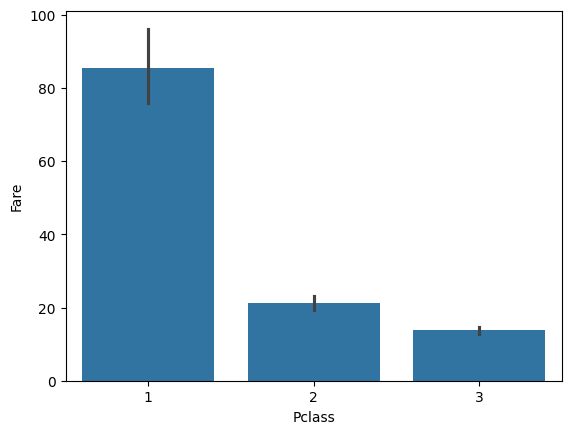

In [ ]:
sns.barplot(data=df,x='Pclass',y='Fare')
plt.show()

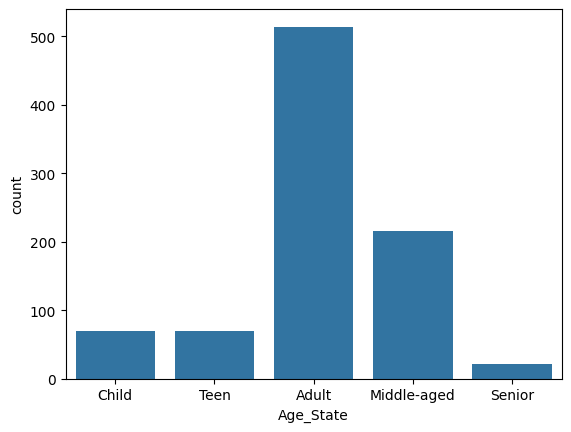

In [ ]:
sns.countplot(data=df,x='Age_State')
plt.show()

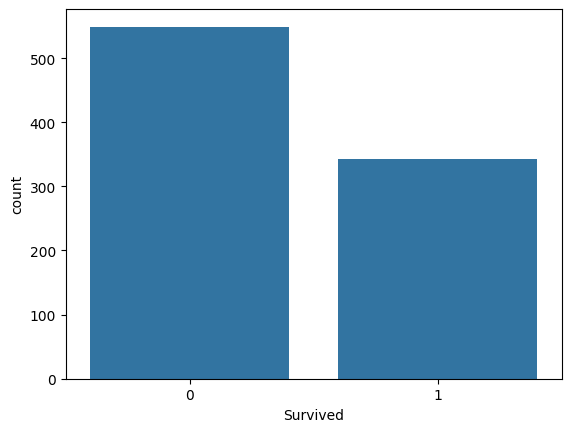

In [ ]:
sns.countplot(data=df,x='Survived')
plt.show()

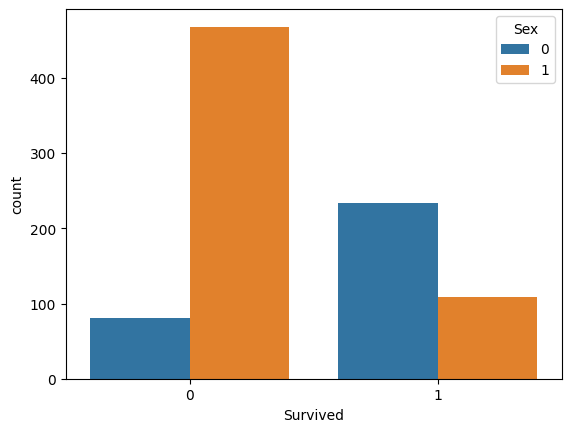

In [ ]:
sns.countplot(data=df,x='Survived',hue='Sex')
plt.show()

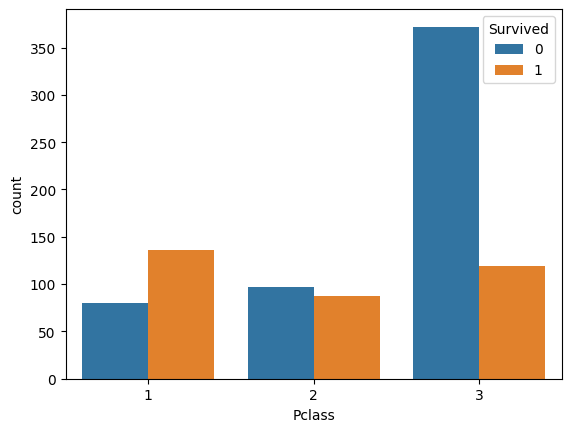

In [ ]:
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.show()

Text(0.5, 1.0, 'Pclass3')

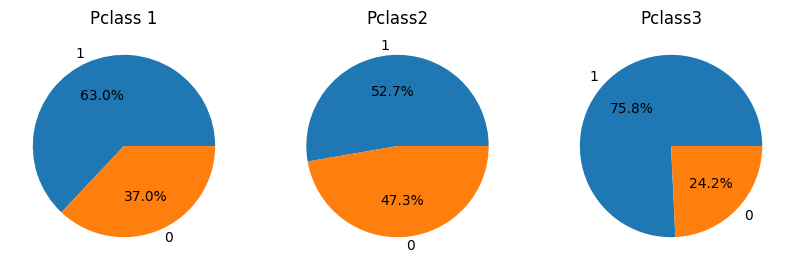

In [ ]:
g1=df[df['Pclass']==1]
g2=df[df['Pclass']==2]
g3=df[df['Pclass']==3]
fig,ax=plt.subplots(1,3,figsize=(10,5))
ax[0].pie(g1['Survived'].value_counts(),labels=g1['Survived'].value_counts().index,autopct='%1.1f%%')
ax[0].set_title('Pclass 1')
ax[1].pie(g2['Survived'].value_counts(),labels=g1['Survived'].value_counts().index,autopct='%1.1f%%')
ax[1].set_title('Pclass2')
ax[2].pie(g3['Survived'].value_counts(),labels=g1['Survived'].value_counts().index,autopct='%1.1f%%')
ax[2].set_title('Pclass3')


In [ ]:
g2['Sex'].value_counts()

Sex
1    108
0     76
Name: count, dtype: int64

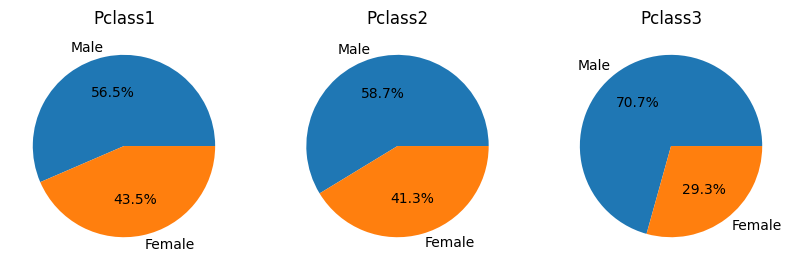

In [ ]:
fig, ax=plt.subplots(1,3,figsize=(10,5))
ax[0].pie(g1['Sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
ax[0].set_title('Pclass1')
ax[1].pie(g2['Sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
ax[1].set_title('Pclass2')
ax[2].pie(g3['Sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
ax[2].set_title('Pclass3')
plt.show()


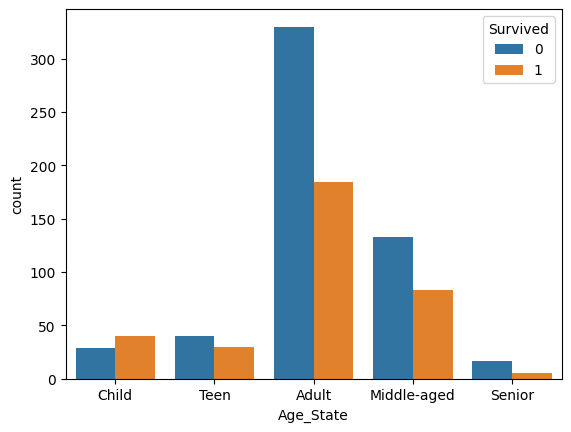

In [ ]:
sns.countplot(data=df,x='Age_State',hue='Survived')
plt.show()

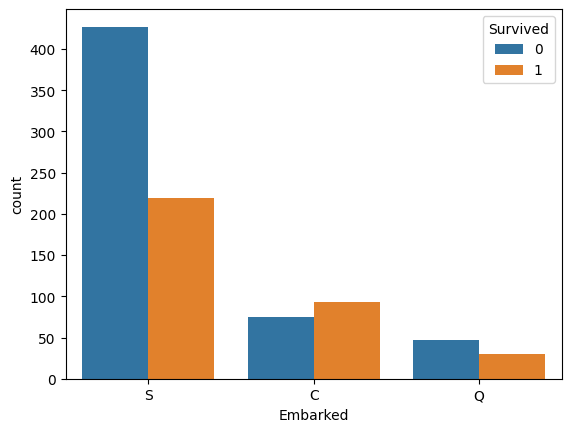

In [ ]:
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.show()

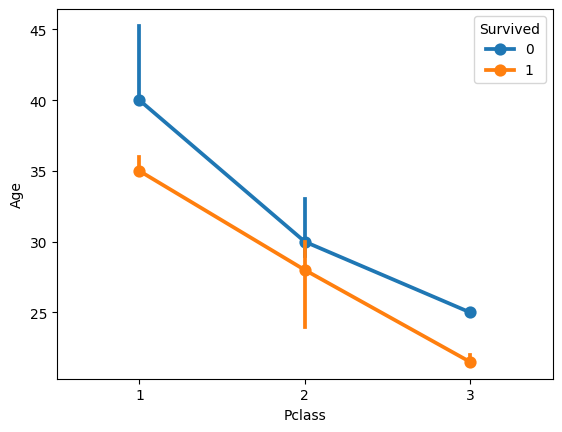

In [ ]:
sns.pointplot(data=df,x='Pclass',y='Age',hue='Survived',estimator=np.median)
plt.show()

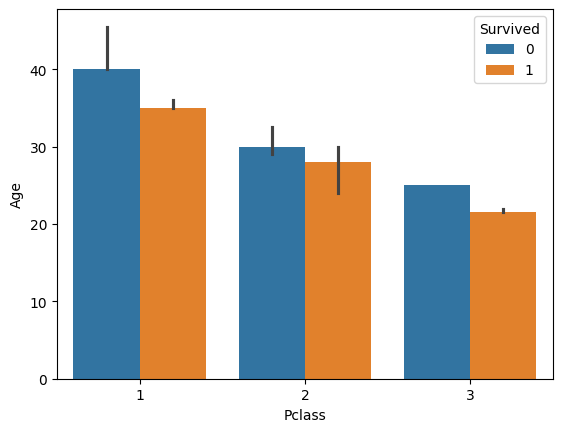

In [ ]:
sns.barplot(data=df,x='Pclass',y='Age',hue='Survived',estimator=np.median)
plt.show()

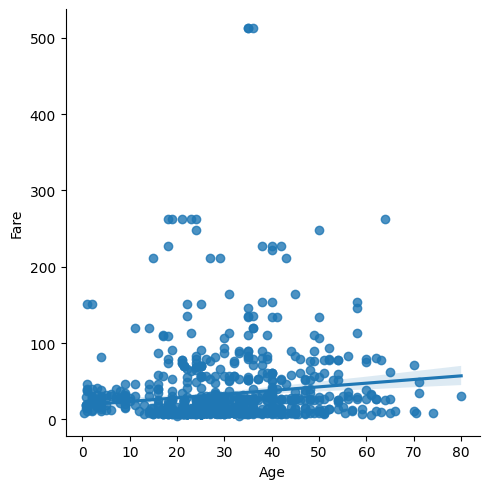

In [ ]:
sns.lmplot(data=df,x='Age',y='Fare')
plt.show()

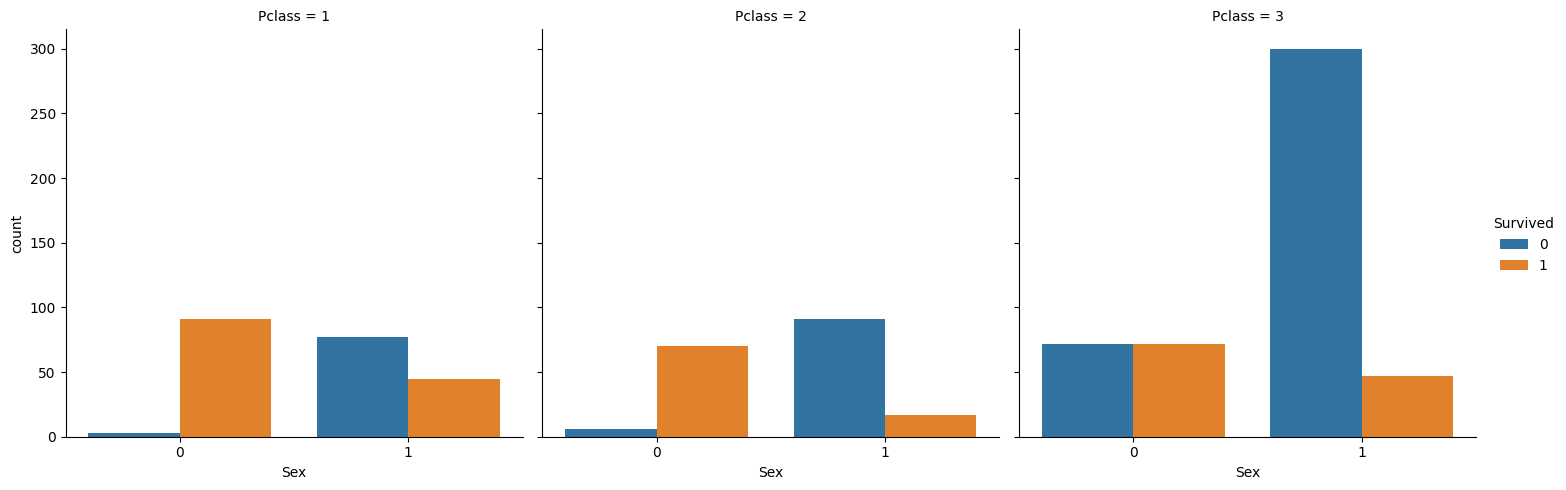

In [ ]:
sns.catplot(data=df,x='Sex',kind='count',hue='Survived',col='Pclass')
plt.show()

In [ ]:
x=df.corr(numeric_only=True)
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.039033,-0.057527,-0.001652,0.018753
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.059579,-0.035322,0.081629,0.250635
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.413583,0.083081,0.018443,-0.561243
Sex,0.042939,-0.543351,0.131900,1.000000,0.102706,-0.114631,-0.245489,-0.175647
Age,0.039033,-0.059579,-0.413583,0.102706,1.000000,-0.249854,-0.175526,0.128484
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.249854,1.000000,0.414838,0.155423
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.175526,0.414838,1.000000,0.212103
Fare,0.018753,0.250635,-0.561243,-0.175647,0.128484,0.155423,0.212103,1.000000


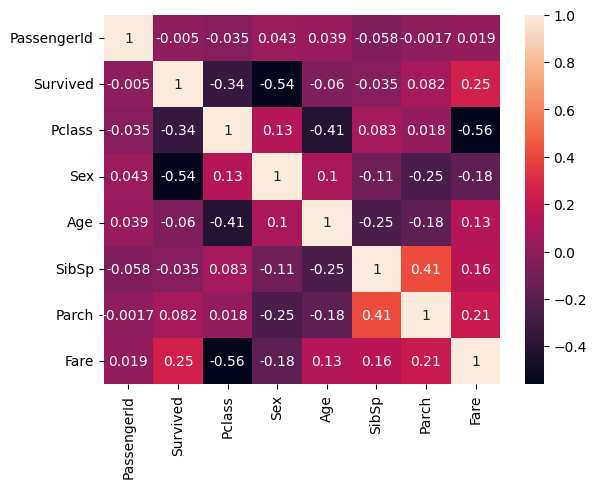

In [ ]:
sns.heatmap(x,annot=True)
plt.show()

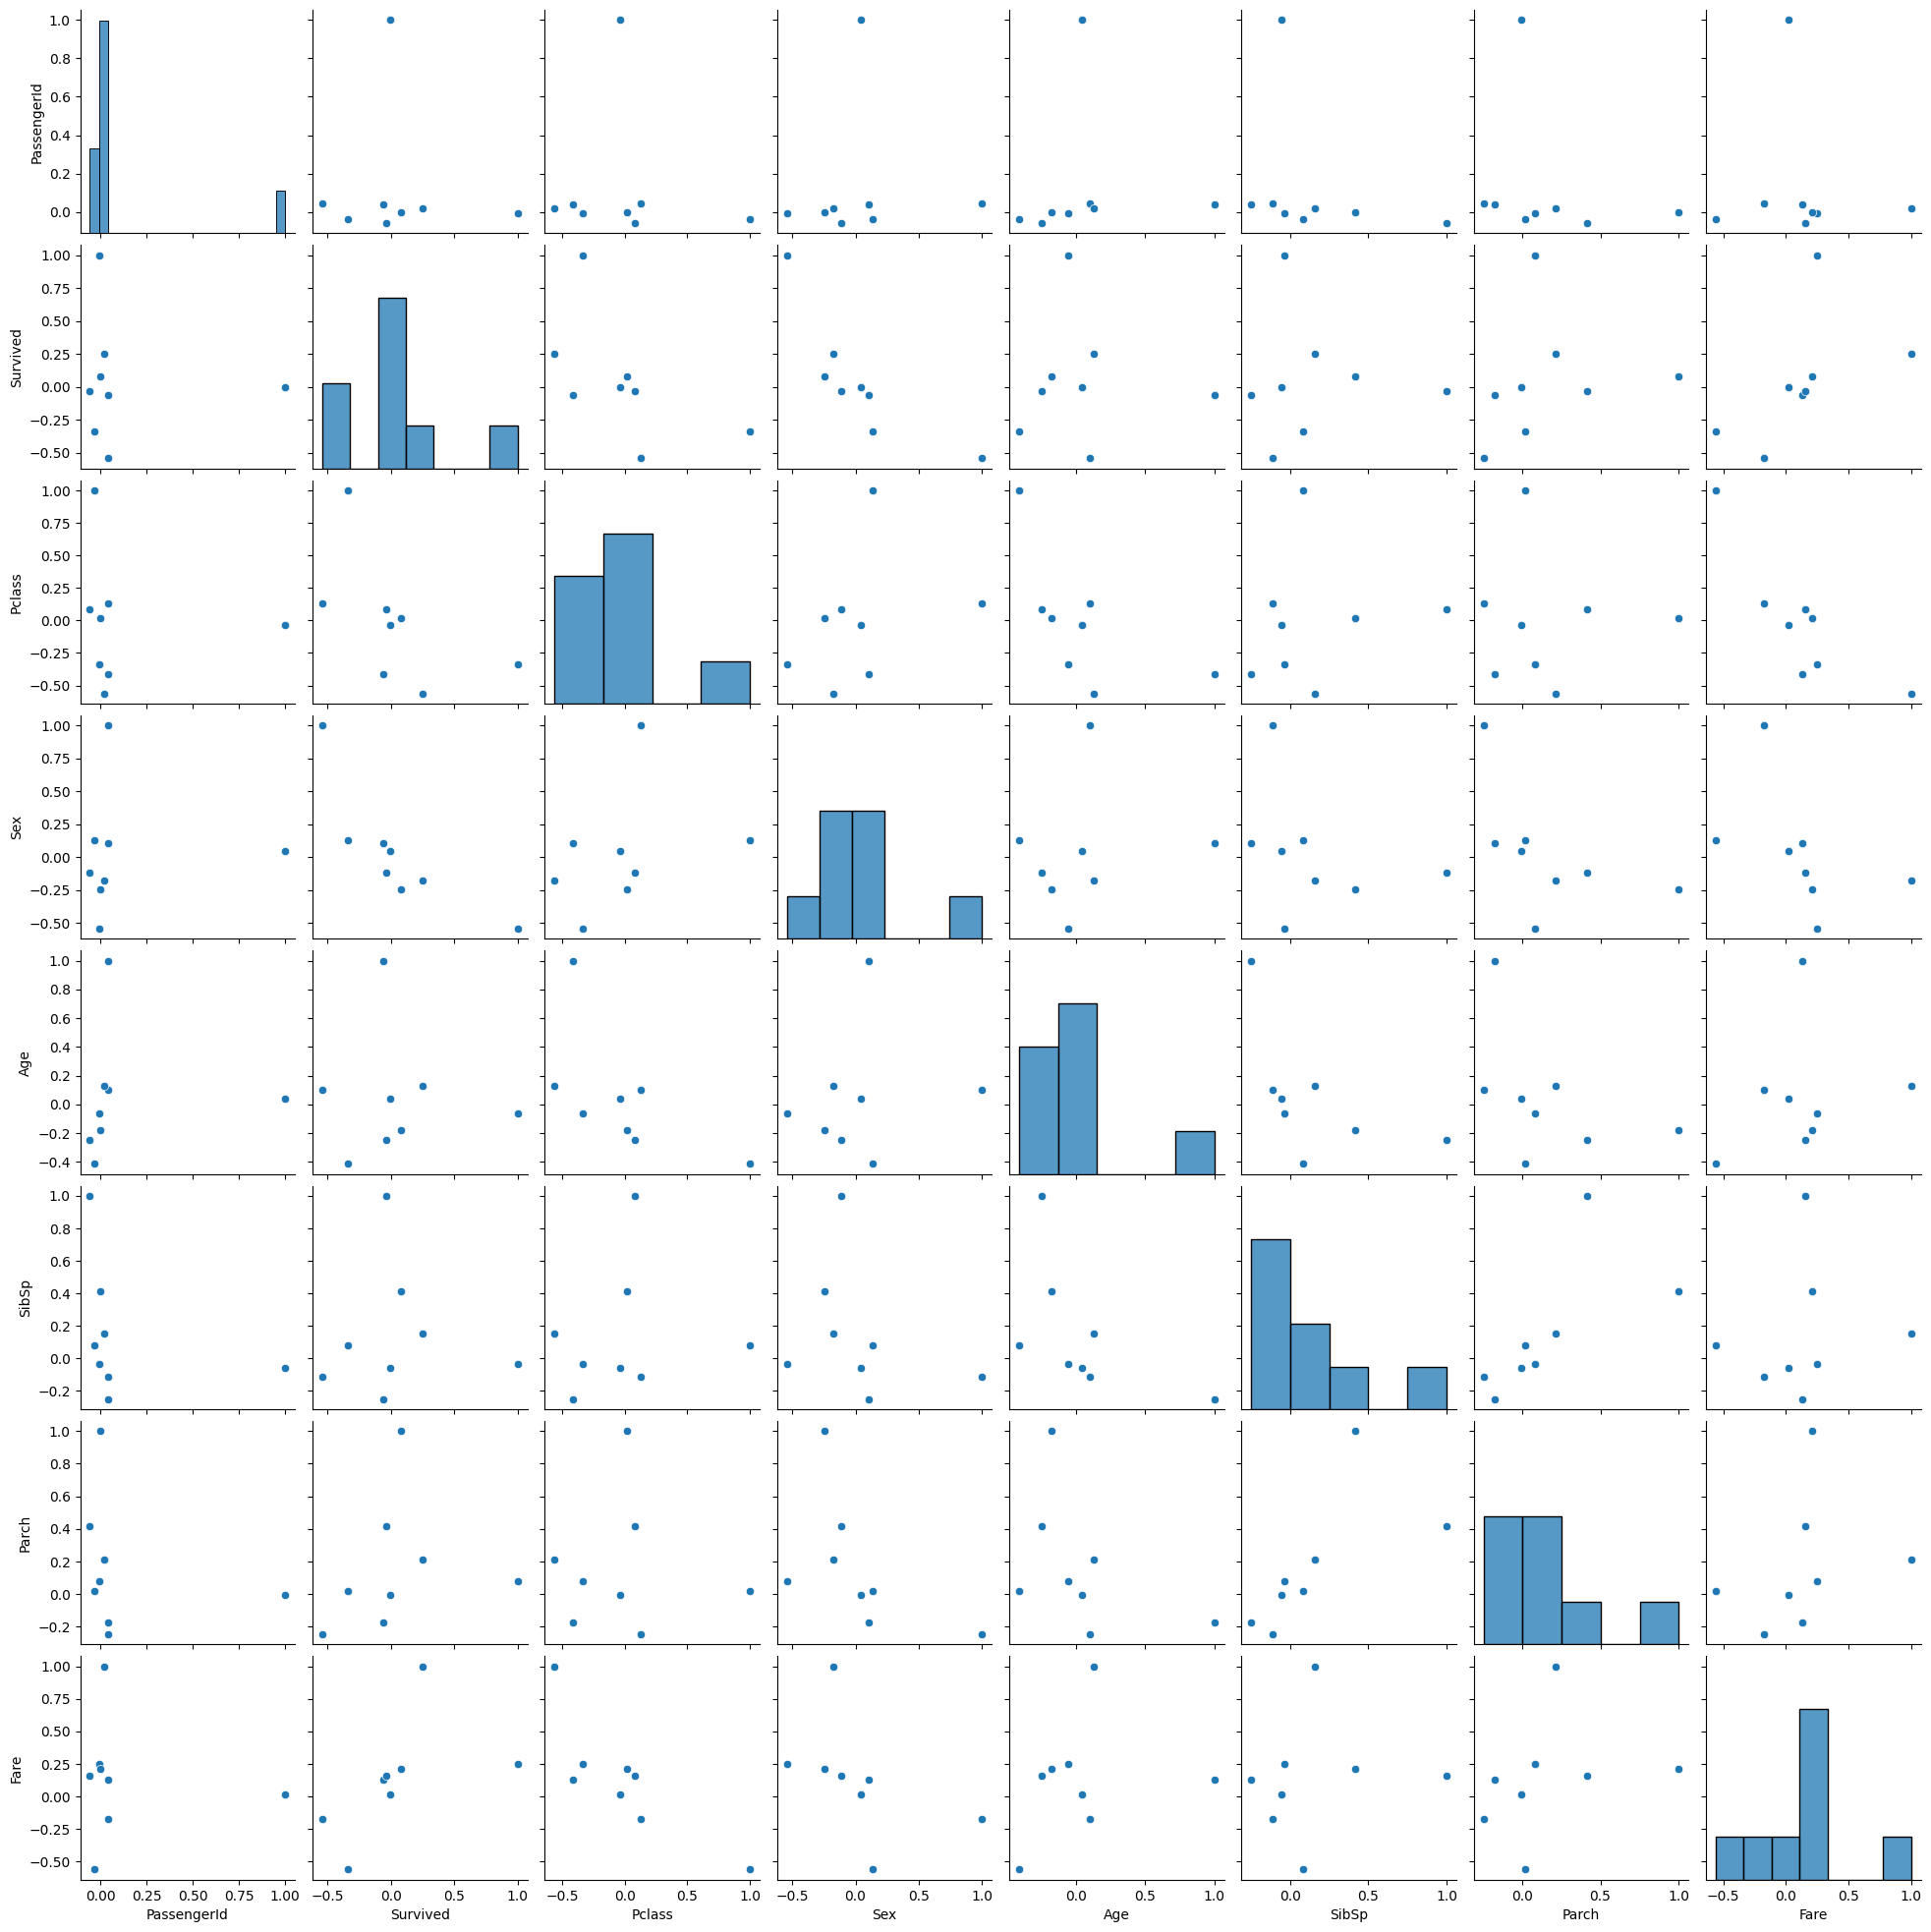

In [ ]:
sns.pairplot(data=x)

In [ ]:
# CHI SQUARE TESTS

In [ ]:
c1=pd.crosstab(df['Survived'],df['Pclass'])
c1

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(c1)

Chi2ContingencyResult(statistic=np.float64(102.88898875696056), pvalue=np.float64(4.549251711298793e-23), dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

In [ ]:
c2=pd.crosstab(df['Survived'],df['Sex'])
c2

Sex,0,1
Survived,,
0,81,468
1,233,109


In [ ]:
chi2_contingency(c2)

Chi2ContingencyResult(statistic=np.float64(260.71702016732104), pvalue=np.float64(1.1973570627755645e-58), dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))

In [ ]:
c3=pd.crosstab(df['Survived'],df['Embarked'])
c3

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [ ]:
chi2_contingency(c3)

Chi2ContingencyResult(statistic=np.float64(25.964452881874784), pvalue=np.float64(2.3008626481449577e-06), dof=2, expected_freq=array([[103.51515152,  47.44444444, 398.04040404],
       [ 64.48484848,  29.55555556, 247.95959596]]))

In [ ]:
c4=pd.crosstab(df['Sex'],df['Pclass'])
c4

Pclass,1,2,3
Sex,,,
0,94,76,144
1,122,108,347


In [ ]:
chi2_contingency(c4)

Chi2ContingencyResult(statistic=np.float64(16.971499095517114), pvalue=np.float64(0.00020638864348233114), dof=2, expected_freq=array([[ 76.12121212,  64.84399551, 173.03479237],
       [139.87878788, 119.15600449, 317.96520763]]))

In [ ]:
#ANOVA

In [ ]:
g1=df[df['Pclass']==1]['Age']
g2=df[df['Pclass']==2]['Age']
g3=df[df['Pclass']==3]['Age']

In [ ]:
from scipy.stats import f_oneway #analysis of variance
f_oneway(g1,g2,g3)

F_onewayResult(statistic=np.float64(93.23971050775184), pvalue=np.float64(1.7514570200140448e-37))

In [ ]:
print(g1.mean())
print(g2.mean())
print(g3.mean())

38.27046296296297
29.86320652173913
24.802281059063137


In [ ]:
g1=df[df['Survived']==1]['Age']
g2=df[df['Survived']==0]['Age']

In [ ]:
f_oneway(g1,g2)

F_onewayResult(statistic=np.float64(3.16692595974415), pvalue=np.float64(0.07548530586358136))

In [ ]:
for pclass in range(1,4):
  g1=df[(df['Survived']==1)&(df['Pclass']==pclass)]['Age']
  g2=df[(df['Survived']==0)&(df['Pclass']==pclass)]['Age']
  print(f_oneway(g1,g2))

F_onewayResult(statistic=np.float64(15.749162021193719), pvalue=np.float64(9.87039863472903e-05))
F_onewayResult(statistic=np.float64(13.989279221659533), pvalue=np.float64(0.00024619112028425737))
F_onewayResult(statistic=np.float64(19.034186442828982), pvalue=np.float64(1.5671364579901245e-05))
